In [1]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
EMOVO = "/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/"
# Run one example
dir_list = os.listdir(EMOVO)
dir_list[0:5]
dir_list.remove('documents')
dir_list

['m2', 'f3', 'm3', 'm1', 'f1', 'f2']

In [5]:
emotion_map = {
    'dis': 'Disgust',
    'gio': 'joy',
    'pau': 'fear',
    'rab': 'anger',
    'sor': 'surprise',
    'tri': 'sadness',
    'neu': 'Neutral'
}

# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for directory in dir_list:
    directory_path = os.path.join(EMOVO, directory)
    if os.path.isdir(directory_path):
        for filename in os.listdir(directory_path):
            if filename.endswith(".wav"):
                # Extract the emotion abbreviation from the filename
                emo_abb = filename.split('-')[0]
                # print(emo_abb)
                # Get the emotion name from the emotion_map dictionary
                emotion = emotion_map.get(emo_abb, 'Unknown')
                # Full path to the audio file
                file_path = os.path.join(directory_path, filename)
                # Append the emotion and file path to the data list
                data.append([emotion, file_path])

    #         break
    # break

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [6]:
df.head(5)

,emotion,path
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...


In [7]:
csv_path='/content/drive/MyDrive/Dataset/metadata/Data_path.csv"'
df.to_csv(csv_path, index=False)

In [8]:
ref = pd.read_csv(csv_path)
ref.head(10)

,emotion,path
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
5,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
6,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
7,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
8,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...
9,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/...


In [9]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
495,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/f2/dis-f2-d2.wav
359,surprise,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m1/sor-m1-b2.wav
476,sadness,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/f1/tri-f1-d1.wav
572,surprise,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/f2/sor-f2-n2.wav
533,Neutral,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/f2/neu-f2-b1.wav
...,...,...
567,surprise,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/f2/sor-f2-n4.wav
514,Neutral,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/f2/neu-f2-n4.wav
82,sadness,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/tri-m2-d1.wav
220,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m3/gio-m3-n3.wav


<Axes: ylabel='count'>

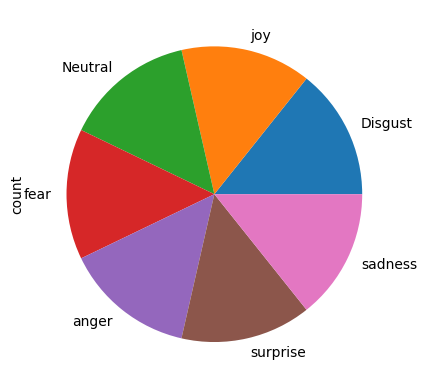

In [10]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [11]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.0 MB/s eta 0:00:00


In [12]:
import resampy
from resampy import resample
import librosa

In [13]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

588


,Features
0,"[-10.774823188781738, -9.86146354675293, -9.38402271270752, -12.01582145690918, -16.081708908081055, -16.87690544128418, -15.813302993774414, -16.51932144165039, -17.465852737426758, -14.013957023620605, -12.324195861816406, -12.125011444091797, -11.586071014404297, -13.450273513793945, -14.496000289916992, -15.658350944519043, -13.777714729309082, -12.628128051757812, -15.14918041229248, -19.931764602661133, -20.99852180480957, -15.096707344055176, -13.725128173828125, -10.973247528076172, -10.017452239990234, -11.46697998046875, -11.681336402893066, -11.424978256225586, -11.016488075256348, -11.611356735229492, -13.497758865356445, -13.550888061523438, -13.92016887664795, -14.044891357421875, -13.586311340332031, -13.987886428833008, -14.106904983520508, -16.88143539428711, -20.357282638549805, -19.945789337158203, -19.58807945251465, -20.69192886352539, -17.537141799926758, -14.982809066772461, -13.321741104125977, -11.207475662231445, -10.028903007507324, -10.93520736694336, -11.873298645019531, -14.443346977233887, -13.062477111816406, -12.375256538391113, -12.944398880004883, -15.175946235656738, -18.559547424316406, -19.474720001220703, -19.78842544555664, -19.56200408935547, -17.704090118408203, -13.826789855957031, -11.832820892333984, -9.777132034301758, -6.651998996734619, -8.145414352416992, -10.244806289672852, -10.857457160949707, -11.747233390808105, -11.739450454711914, -11.555925369262695, -10.109159469604492, -10.60155963897705, -11.9639892578125, -12.879951477050781, -13.58357048034668, -13.561251640319824, -12.871505737304688, -12.431024551391602, -12.956954956054688, -11.794103622436523, -11.17971134185791, -10.481969833374023, -9.848459243774414, -9.246828079223633, -9.082623481750488, -10.256256103515625, -9.70768928527832, -9.391271591186523, -11.556344985961914, -15.080830574035645, -15.589216232299805, -15.179010391235352, -16.641035079956055, -16.70014190673828, -11.640704154968262, -10.506922721862793, -13.014129638671875, -9.264966011047363, -8.905851364135742, -9.28618049621582, -9.152671813964844, ...]"
1,"[-8.104290008544922, -11.446904182434082, -12.620349884033203, -12.470361709594727, -11.054910659790039, -11.065166473388672, -10.729257583618164, -10.438878059387207, -8.71428108215332, -9.43058967590332, -10.816625595092773, -9.698534965515137, -10.092920303344727, -11.302618026733398, -11.25202751159668, -11.693979263305664, -12.885896682739258, -12.150358200073242, -11.340550422668457, -9.74754524230957, -9.821413040161133, -6.8152642250061035, -5.5756354331970215, -9.195283889770508, -13.4154634475708, -13.490884780883789, -10.365867614746094, -11.284391403198242, -10.820914268493652, -10.649188041687012, -13.38128662109375, -15.651588439941406, -15.569158554077148, -15.015710830688477, -15.23980712890625, -13.436307907104492, -13.893328666687012, -13.914402961730957, -15.508493423461914, -16.681598663330078, -16.394184112548828, -16.294424057006836, -16.118389129638672, -15.943577766418457, -14.899221420288086, -14.497456550598145, -16.018844604492188, -17.070512771606445, -15.88525104522705, -15.404803276062012, -16.157264709472656, -16.440998077392578, -17.682790756225586, -17.5075740814209, -16.231496810913086, -16.434263229370117, -16.004030227661133, -16.294330596923828, -15.373565673828125, -14.31769847869873, -15.246174812316895, -16.11726951599121, -15.640373229980469, -14.9719820022583, -12.878334045410156, -13.3060302734375, -13.065640449523926, -14.169265747070312, -13.007390022277832, -12.270272254943848, -12.53095817565918, -12.908166885375977, -10.56016731262207, -10.3718843460083, -10.020842552185059, -10.514120101928711, -13.333456039428711, -12.287050247192383, -13.265436172485352, -15.353384017944336, -15.435388565063477, -16.637876510620117, -17.499256134033203, -15.472491264343262, -9.320738792419434, -8.509870529174805, -11.130102157592773, -12.074119567871094, -13.309483528137207, -11.91635799407959, -8.380859375, -7.602222442626953, -8.387954711914062, 

In [14]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-d2.wav,-10.774823,-9.861464,-9.384023,-12.015821,-16.081709,-16.876905,-15.813303,-16.519321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b2.wav,-8.104290,-11.446904,-12.620350,-12.470362,-11.054911,-11.065166,-10.729258,-10.438878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l1.wav,-26.565060,-24.998581,-24.278589,-22.253040,-22.559967,-20.991720,-19.367088,-16.067938,...,0.665654,0.683326,0.654948,0.645641,0.686552,0.722244,0.722761,0.714122,0.71202,0.009788
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l2.wav,-5.915870,-6.614184,-8.254465,-9.160292,-9.051309,-10.346746,-12.127737,-14.309746,...,0.630618,0.621645,0.607014,0.632613,0.738665,0.794409,0.769243,0.754068,0.72619,0.009936
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-n3.wav,-11.815857,-11.249484,-12.536919,-13.047693,-14.348735,-16.342918,-12.378302,-8.836857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(588, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-d2.wav,-10.774823,-9.861464,-9.384023,-12.015821,-16.081709,-16.876905,-15.813303,-16.519321,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b2.wav,-8.104290,-11.446904,-12.620350,-12.470362,-11.054911,-11.065166,-10.729258,-10.438878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l1.wav,-26.565060,-24.998581,-24.278589,-22.253040,-22.559967,-20.991720,-19.367088,-16.067938,...,0.665654,0.683326,0.654948,0.645641,0.686552,0.722244,0.722761,0.714122,0.71202,0.009788
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l2.wav,-5.915870,-6.614184,-8.254465,-9.160292,-9.051309,-10.346746,-12.127737,-14.309746,...,0.630618,0.621645,0.607014,0.632613,0.738665,0.794409,0.769243,0.754068,0.72619,0.009936
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-n3.wav,-11.815857,-11.249484,-12.536919,-13.047693,-14.348735,-16.342918,-12.378302,-8.836857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [16]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
494,-8.844404,-11.097136,-16.732986,-16.634096,-16.782032,-17.517395,-17.529566,-16.310383,-15.575800,-15.198030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
375,-10.654509,-11.404927,-11.273948,-10.604520,-10.351622,-10.549007,-12.009183,-14.059158,-15.502042,-14.552717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
367,-3.092183,0.205999,0.327119,-0.794246,-3.012112,-3.219369,-3.935480,-1.120079,-1.003153,-4.467672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,-12.971567,-11.791082,-11.285364,-9.531130,-8.662378,-10.350409,-10.304983,-7.865223,-8.522092,-9.804274,...,0.633552,0.631564,0.641639,0.636896,0.685035,0.760690,0.794530,0.769037,0.756664,0.008544
48,-4.406888,-7.028491,-9.175093,-5.798774,-6.494252,-7.465659,-7.688715,-7.648646,-10.166625,-13.655001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
567,-13.615100,-11.802273,-10.357880,-13.235476,-15.190712,-15.556183,-16.379711,-14.357984,-14.836474,-17.472248,...,0.501656,0.511134,0.459672,0.387681,0.415838,0.456293,0.423684,0.470674,0.524174,0.062391
501,-14.729175,-13.960179,-14.993240,-14.215930,-11.917919,-8.201792,-8.679506,-9.516710,-10.931742,-13.590925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-5.915870,-6.614184,-8.254465,-9.160292,-9.051309,-10.346746,-12.127737,-14.309746,-17.068737,-12.523373,...,0.630618,0.621645,0.607014,0.632613,0.738665,0.794409,0.769243,0.754068,0.726190,0.009936
444,-26.273602,-24.610645,-23.862413,-22.372465,-20.720362,-20.519424,-19.971300,-20.535355,-22.100994,-19.788446,...,0.617660,0.604862,0.634140,0.685734,0.749673,0.721370,0.707645,0.717294,0.692910,0.006204
350,-5.926369,-7.176857,-9.882678,-9.588182,-8.349410,-8.616690,-8.565845,-8.900429,-9.730677,-7.334915,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]
(470, 531, 1)
(118, 531, 1)


In [18]:
lb.classes_

array(['Disgust', 'Neutral', 'anger', 'fear', 'joy', 'sadness',
       'surprise'], dtype=object)

In [19]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

588


,mel_spectrogram
0,"[-27.849682, -26.846792, -29.3919, -36.809013, -43.67643, -45.005234, -45.690098, -46.766483, -41.96239, -30.247236, -25.419224, -26.048668, -26.707415, -28.612776, -30.378569, -31.610723, -32.190918, -31.755678, -34.23925, -38.504852, -40.841217, -30.328094, -28.49763, -30.820435, -31.958603, -33.516773, -33.31423, -33.37477, -34.866856, -36.052834, -38.510654, -39.678455, -40.85876, -42.4656, -42.55203, -42.27036, -43.597435, -46.840614, -51.190807, -52.957157, -53.390324, -53.85412, -41.78289, -29.509062, -25.443415, -23.870615, -24.120214, -26.248072, -26.949759, -28.929256, -30.117064, -31.659828, -33.11076, -35.7653, -42.2518, -46.16295, -47.503613, -43.129105, -37.28719, -31.059696, -30.146399, -29.506601, -28.093357, -28.619326, -29.546848, -28.51111, -27.193455, -26.528896, -27.179247, -24.737362, -24.297077, -28.965193, -32.289043, -33.24647, -33.778664, -34.073242, -33.178047, -32.90745, -32.249653, -29.630129, -26.268507, -24.529186, -23.588873, -23.957973, -26.059954, -27.647026, -29.060053, -32.09022, -37.053364, -42.77254, -44.00674, -43.912777, -32.809437, -25.494083, -25.527851, -28.671656, -29.244053, -30.579544, -32.123447, -33.42207, ...]"
1,"[-21.515442, -25.4655, -34.38824, -36.318375, -29.696888, -25.555199, -24.650349, -23.15247, -22.401888, -21.871096, -22.633776, -23.009785, -24.643236, -28.261492, -30.340649, -31.415207, -28.346043, -25.628681, -24.720676, -24.25645, -24.434006, -24.315866, -23.820028, -24.047026, -24.418123, -24.581276, -23.982538, -21.699669, -20.631123, -19.623877, -21.049055, -24.443663, -25.103134, -25.24128, -28.217182, -30.295645, -28.592703, -26.079607, -26.613054, -28.81304, -29.856976, -30.58697, -32.07707, -33.789837, -32.44372, -29.090103, -28.24276, -29.135363, -28.328226, -25.366764, -24.576982, -27.832546, -30.663736, -25.80126, -23.241636, -25.535824, -26.944414, -27.643291, -26.462563, -26.597723, -31.529274, -39.957012, -35.950043, -28.64763, -25.455189, -24.329487, -23.267927, -25.615217, -26.975458, -25.58421, -28.445032, -35.46142, -30.048187, -26.029604, -23.851902, -23.88687, -25.651157, -25.004244, -28.222645, -36.592243, -42.103146, -44.142162, -45.54881, -37.93818, -26.349436, -23.746927, -24.80299, -24.593235, -24.605345, -23.725271, -22.833881, -24.12514, -25.805086, -27.134909, -27.49922, -26.275068, -25.84227, -25.5586, -26.31609, -27.691174, ...]"
2,"[-60.287205, -56.37166, -55.7579, -52.905003, -51.025715, -49.212166, -45.788834, -40.98441, -37.271065, -34.951206, -32.084213, -29.460016, -28.526083, -28.611345, -30.148659, -32.357315, -34.217346, -35.204456, -36.543236, -36.65523, -36.145893, -35.1311, -31.284218, -32.87881, -41.73457, -48.647427, -38.310516, -27.11903, -25.653425, -30.75163, -34.019672, -35.592503, -36.896244, -36.87109, -37.07073, -36.527416, -38.414703, -39.922268, -40.957264, -42.78451, -42.888355, -40.37087, -37.654896, -31.5142, -29.18156, -30.391222, -32.421535, -33.84075, -35.590706, -37.710213, -42.146255, -46.064693, -46.92692, -47.1591, -42.839382, -29.46254, -24.543922, -26.796448, -26.945742, -24.583359, -28.60828, -30.150543, -30.067327, -31.472383, -30.19405, -28.393456, -26.918602, -25.376434, -24.168758, -22.569986, -22.405085, -24.262272, -26.372149, -26.610607, -26.150742, -25.419504, -24.706764, -23.684986, -23.970112, -25.186497, -27.41912, -28.35499, -27.698185, -25.817648, -25.983658, -28.769337, -33.353016, -37.086285, -41.5261, -41.110664, -40.849487, -40.638058, -39.644478, -38.416824, -36.621346, -34.64313, -32.805504, -32.43398, -33.148647, -36.57965, ...]"
3,"[-20.631313, -20.761246, -23.523872, -24.528507, -27.815744, -33.99969, -39.277096, -40.835594, -42.083225, -31.281277, -24.379076, -24.570581, -26.097876, -24.311413, -24.841618, -28.990122, -29.818033, -29.678282, -29.939165, -30.456308, -31.266708, -32.439198, -35.60882, -39.902596, -41.579006, -41.281746, -40.658638, -41.657646, -41.992073, -42.29066, -42.070667, -38.109497, -36.228264, -35.08571, -32.391636, -30.877642, -30.366

In [20]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-d2.wav,-27.849682,-26.846792,-29.391899,-36.809013,-43.676430,-45.005234,-45.690098,-46.766483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b2.wav,-21.515442,-25.465500,-34.388241,-36.318375,-29.696888,-25.555199,-24.650349,-23.152470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l1.wav,-60.287205,-56.371658,-55.757900,-52.905003,-51.025715,-49.212166,-45.788834,-40.984409,...,-45.433975,-46.078251,-46.540062,-47.562946,-47.174229,-43.179863,-39.669930,-39.713913,-38.820549,-35.577663
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l2.wav,-20.631313,-20.761246,-23.523872,-24.528507,-27.815744,-33.999691,-39.277096,-40.835594,...,-36.018478,-35.602608,-36.129211,-40.466736,-45.895206,-47.871365,-48.641285,-42.396561,-33.199894,-32.073017
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-n3.wav,-19.917084,-19.665659,-21.571352,-21.405615,-21.610352,-23.361219,-24.501650,-26.788126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
494,-19.121078,-21.063217,-21.027311,-20.290648,-20.591848,-17.775219,-15.926165,-16.526951,-16.613832,-15.787060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,-30.007959,-27.492483,-27.218897,-29.401920,-32.998695,-30.786810,-29.756351,-32.139168,-32.777344,-31.644258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,-12.752933,-7.702022,-3.705164,-0.906977,-0.222476,-0.327161,-1.389726,-2.776505,-5.350163,-8.824801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,-33.012806,-33.231533,-34.462811,-32.534401,-32.576168,-32.794838,-29.782871,-27.461830,-28.794582,-30.157812,...,-58.167534,-57.845943,-58.097481,-57.955143,-58.417683,-58.704556,-58.691982,-58.583843,-57.095657,-58.023788
48,-20.585300,-20.604849,-24.758204,-29.521757,-27.850548,-23.571304,-21.841503,-21.744041,-22.284876,-22.119181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,-22.889826,-15.425029,-11.562465,-10.293539,-10.278427,-10.708636,-10.576160,-11.165653,-14.567341,-16.811415,...,-46.674973,-48.828251,-50.142185,-50.977837,-51.462612,-51.463501,-51.463501,-51.463501,-51.463501,-51.463501
501,-31.075138,-32.686634,-35.412922,-36.112820,-22.779797,-14.037270,-11.966501,-12.987698,-12.990940,-14.037029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-20.631313,-20.761246,-23.523872,-24.528507,-27.815744,-33.999691,-39.277096,-40.835594,-42.083225,-31.281277,...,-36.018478,-35.602608,-36.129211,-40.466736,-45.895206,-47.871365,-48.641285,-42.396561,-33.199894,-32.073017
444,-60.970051,-58.526550,-56.603218,-53.898884,-50.972904,-49.395813,-48.483994,-48.036396,-47.488998,-42.022285,...,-62.869061,-62.368351,-61.721466,-61.947109,-61.892464,-61.975746,-62.319534,-62.238056,-61.871655,-63.006866
350,-12.808010,-12.328065,-12.323631,-11.941147,-11.773743,-11.869117,-11.780223,-10.723728,-10.779922,-10.615150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]
(470, 259, 1)
(118, 259, 1)


In [23]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-d2.wav,-27.849682,-26.846792,-29.391899,-36.809013,-43.676430,-45.005234,-45.690098,-46.766483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b2.wav,-21.515442,-25.465500,-34.388241,-36.318375,-29.696888,-25.555199,-24.650349,-23.152470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l1.wav,-60.287205,-56.371658,-55.757900,-52.905003,-51.025715,-49.212166,-45.788834,-40.984409,...,-45.433975,-46.078251,-46.540062,-47.562946,-47.174229,-43.179863,-39.669930,-39.713913,-38.820549,-35.577663
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l2.wav,-20.631313,-20.761246,-23.523872,-24.528507,-27.815744,-33.999691,-39.277096,-40.835594,...,-36.018478,-35.602608,-36.129211,-40.466736,-45.895206,-47.871365,-48.641285,-42.396561,-33.199894,-32.073017
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-n3.wav,-19.917084,-19.665659,-21.571352,-21.405615,-21.610352,-23.361219,-24.501650,-26.788126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


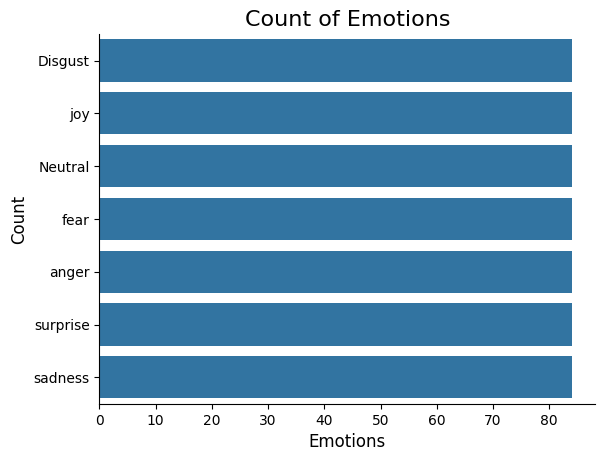

In [24]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [25]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [26]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [27]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [28]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [29]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [30]:
len(X), len(Y), data_path.path.shape

(1764, 1764, (588,))

In [31]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.080213,0.647164,0.626099,0.677195,0.751934,0.707723,0.618787,0.659702,0.688711,0.661570,...,0.000146,0.000160,0.000134,0.000085,0.000033,0.000024,0.000021,0.000015,1.411706e-06,Disgust
1,0.177903,0.673249,0.688958,0.742476,0.762782,0.705696,0.652551,0.691578,0.695299,0.699243,...,0.000198,0.000206,0.000182,0.000131,0.000079,0.000072,0.000069,0.000061,4.679279e-05,Disgust
2,0.109253,0.667336,0.620103,0.612986,0.681794,0.759025,0.666927,0.628391,0.704512,0.673415,...,0.000040,0.000044,0.000041,0.000037,0.000029,0.000018,0.000008,0.000004,2.973140e-07,Disgust
3,0.116140,0.655755,0.578811,0.600242,0.699535,0.665732,0.601178,0.556744,0.573888,0.676340,...,0.009351,0.005138,0.002165,0.001284,0.001759,0.002030,0.002689,0.001051,7.554985e-05,joy
4,0.203433,0.677434,0.657240,0.593658,0.666016,0.729237,0.659682,0.571073,0.553721,0.616646,...,0.009766,0.005488,0.002554,0.001662,0.002049,0.002291,0.002939,0.001369,4.044185e-04,joy


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]]
(1411, 155, 1)
(353, 155, 1)


(1764, 7)

In [33]:
lb.classes_

array(['Disgust', 'Neutral', 'anger', 'fear', 'joy', 'sadness',
       'surprise'], dtype=object)

In [34]:
#Accuarte class labels

In [35]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-d2.wav,-27.849682,-26.846792,-29.391899,-36.809013,-43.676430,-45.005234,-45.690098,-46.766483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b2.wav,-21.515442,-25.465500,-34.388241,-36.318375,-29.696888,-25.555199,-24.650349,-23.152470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l1.wav,-60.287205,-56.371658,-55.757900,-52.905003,-51.025715,-49.212166,-45.788834,-40.984409,...,-45.433975,-46.078251,-46.540062,-47.562946,-47.174229,-43.179863,-39.669930,-39.713913,-38.820549,-35.577663
3,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l2.wav,-20.631313,-20.761246,-23.523872,-24.528507,-27.815744,-33.999691,-39.277096,-40.835594,...,-36.018478,-35.602608,-36.129211,-40.466736,-45.895206,-47.871365,-48.641285,-42.396561,-33.199894,-32.073017
4,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-n3.wav,-19.917084,-19.665659,-21.571352,-21.405615,-21.610352,-23.361219,-24.501650,-26.788126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b1.wav,-18.525545,-16.571051,-16.761137,-17.185205,-18.309088,-19.248512,-20.373480,-23.348089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-d1.wav,-31.578220,-27.776627,-25.649420,-22.725935,-22.872803,-26.424419,-29.454182,-32.118069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-n4.wav,-31.280022,-30.034412,-30.238594,-29.703638,-30.253267,-30.139256,-27.693819,-27.287966,...,-41.972458,-42.265018,-43.349926,-43.579205,-43.589973,-41.638489,-39.751602,-43.387878,-49.964245,-53.359226
8,Disgust,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/dis-m2-l3.wav,-41.102467,-40.958904,-42.277332,-42.995705,-44.147865,-45.830208,-46.344254,-31.666824,...,-53.091377,-51.798538,-33.511417,-25.543833,-21.653633,-20.866552,-21.464901,-21.092836,-21.601633,-23.967102
9,joy,/content/drive/MyDrive/Dataset/Datasets/EMOVO/EMOVO/m2/gio-m2-b3.wav,-29.513193,-26.608028,-26.326042,-26.566277,-28.010761,-27.762838,-26.010054,-26.352039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


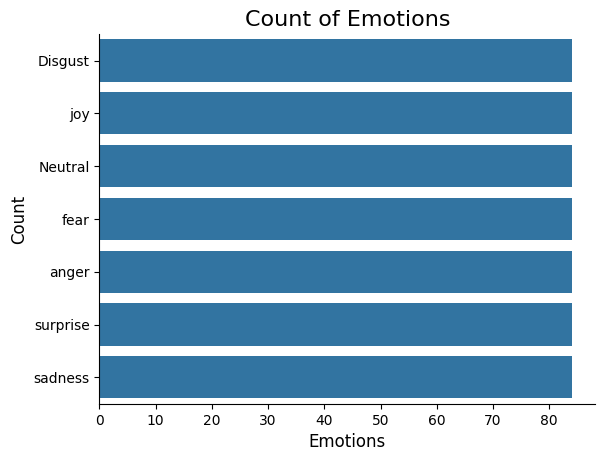

In [36]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [37]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [38]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [39]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [40]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [41]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [42]:
len(X), len(Y), data_path.path.shape

(2352, 2352, (588,))

In [43]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.080213,0.647164,0.626099,0.677195,0.751934,0.707723,0.618787,0.659702,0.688711,0.661570,...,0.000146,0.000160,0.000134,0.000085,0.000033,0.000024,0.000021,0.000015,1.411706e-06,Disgust
1,0.095209,0.642340,0.646144,0.709664,0.753615,0.682325,0.632563,0.680293,0.687223,0.674959,...,0.000148,0.000162,0.000134,0.000087,0.000035,0.000026,0.000025,0.000018,3.822476e-06,Disgust
2,0.109253,0.667336,0.620103,0.612986,0.681794,0.759025,0.666927,0.628391,0.704512,0.673415,...,0.000040,0.000044,0.000041,0.000037,0.000029,0.000018,0.000008,0.000004,2.973140e-07,Disgust
3,0.100812,0.654224,0.601636,0.609288,0.670507,0.749978,0.662223,0.623023,0.677040,0.691484,...,0.000042,0.000040,0.000043,0.000033,0.000026,0.000016,0.000008,0.000004,2.764526e-07,Disgust
4,0.116140,0.655755,0.578811,0.600242,0.699535,0.665732,0.601178,0.556744,0.573888,0.676340,...,0.009351,0.005138,0.002165,0.001284,0.001759,0.002030,0.002689,0.001051,7.554985e-05,joy


In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
(1881, 155, 1)
(471, 155, 1)


(2352, 7)

In [45]:
lb.classes_

array(['Disgust', 'Neutral', 'anger', 'fear', 'joy', 'sadness',
       'surprise'], dtype=object)

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
Accuracy Score for model1 =  0.17834394904458598
Accuracy Score for model2 =  0.17834394904458598
Accuracy Score for model3 =  0.15711252653927812
Accuracy Score for average ensemble =  0.18046709129511676
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step
Weighted average method
Accuracy Score for model1 =  0.17834394904458598
Accuracy Score for model2 =  0.17834394904458598
Accuracy Score for model3 =  0.15711252653927812
Accuracy Score for average ensemble =  0.18046709129511676
Accuracy Score for weighted average ensemble =  0.17834394904458598
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
Max 

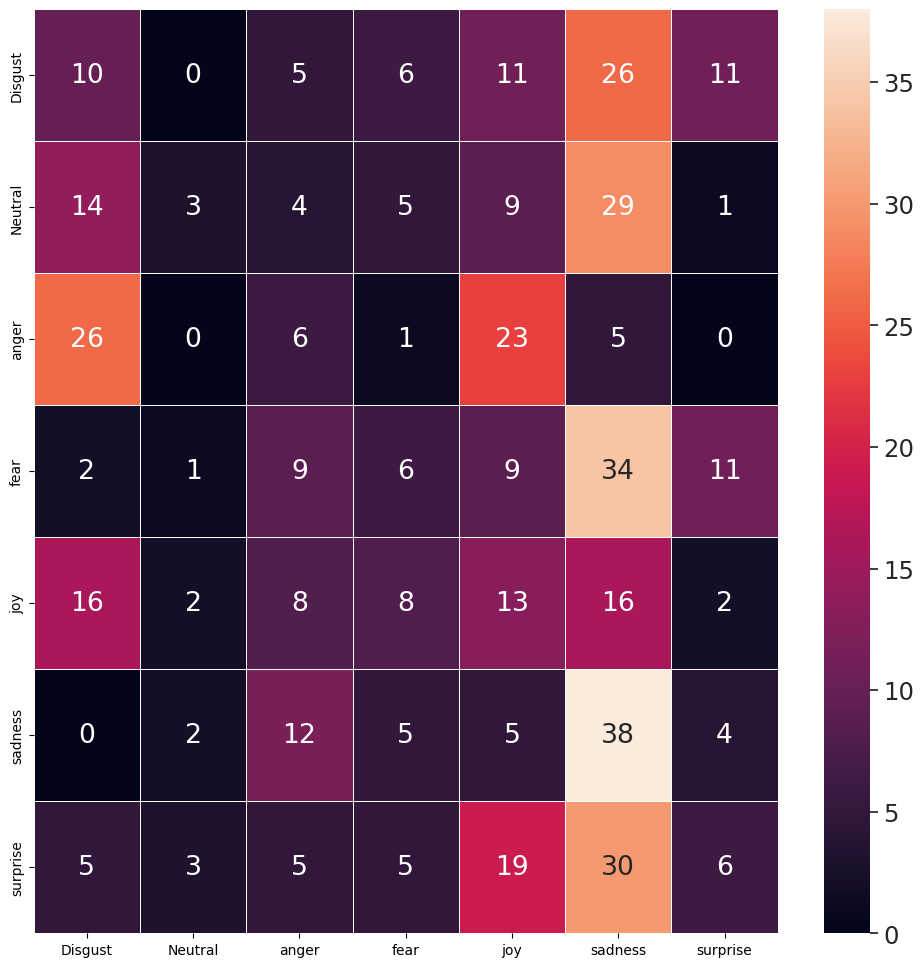

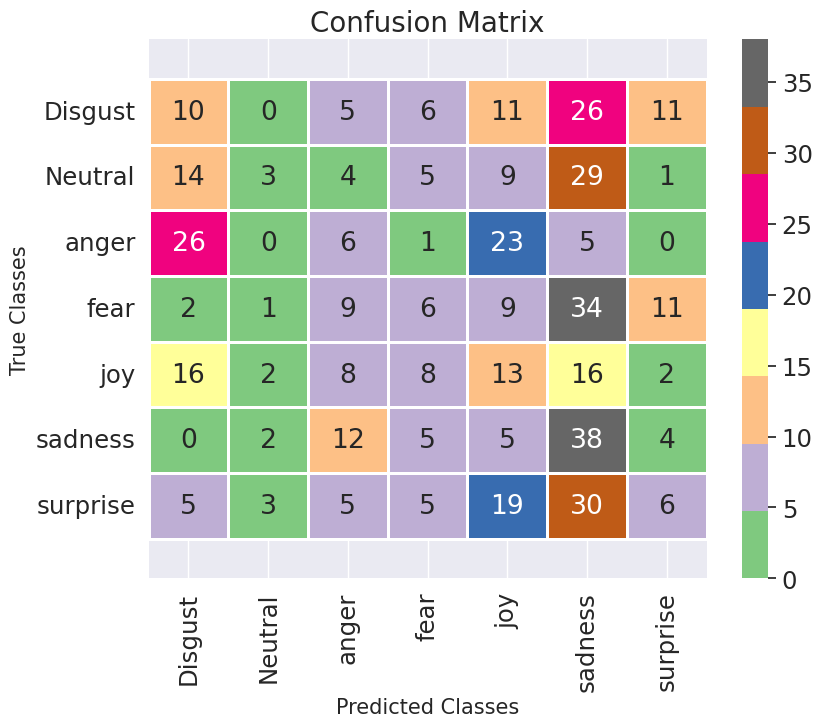

In [47]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model1-emo-db.weights.h5')
model2 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model2-emo-db.weights.h5')
model3 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step
Weighted average method
Accuracy Score for model1 =  0.17834394904458598
Accuracy Score for model2 =  0.17834394904458598
Accuracy Score for model3 =  0.15711252653927812
Accuracy Score for average ensemble =  0.18046709129511676
Accuracy Score for weighted average ensemble =  0.17834394904458598


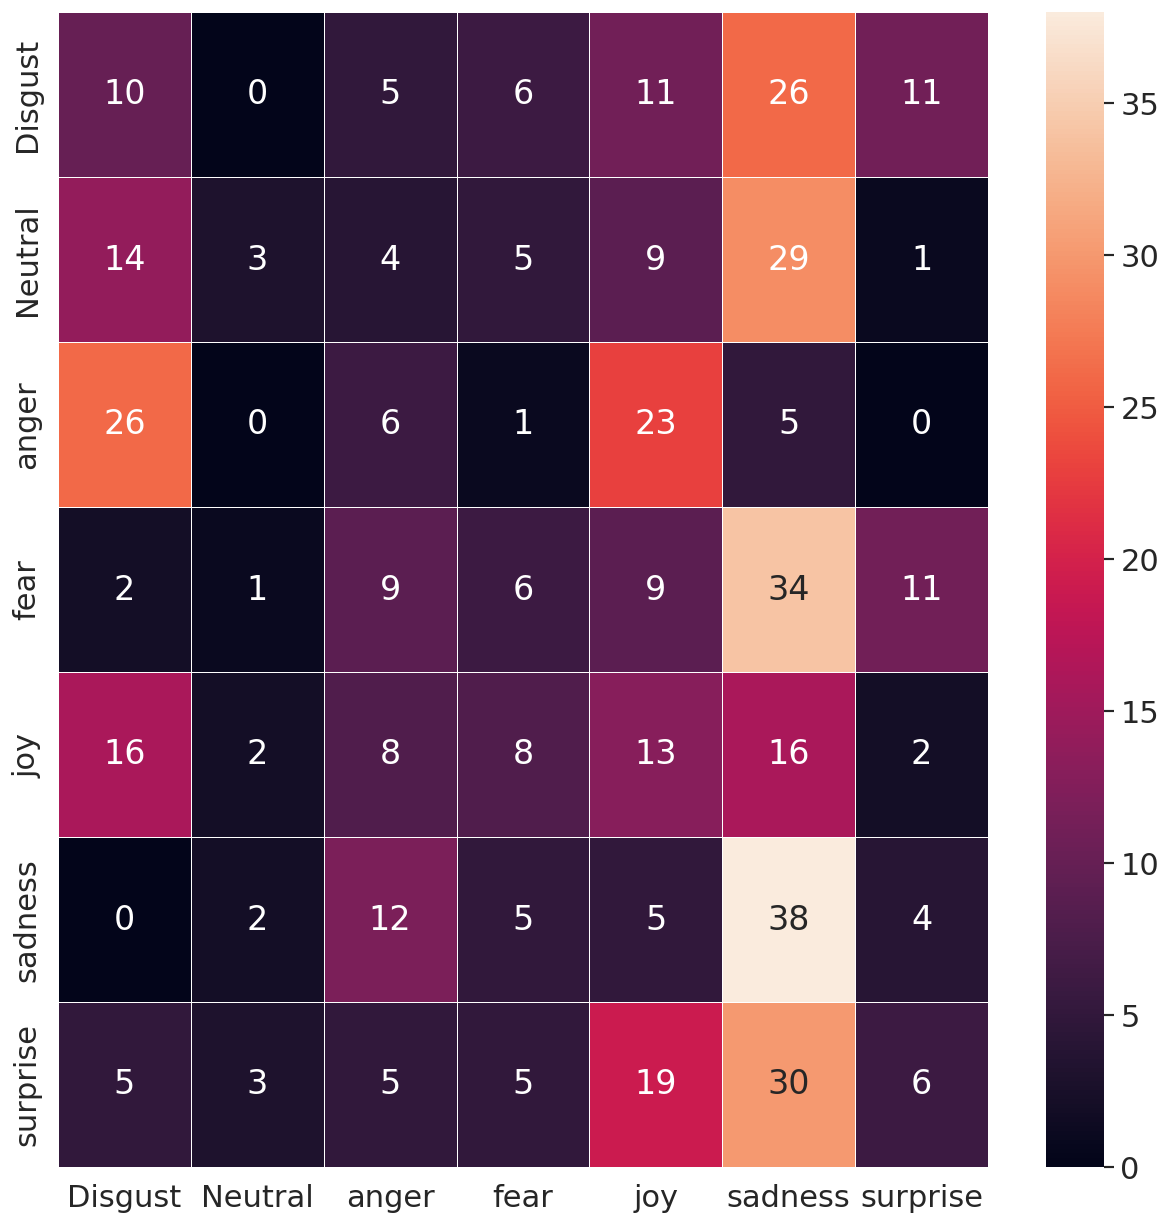

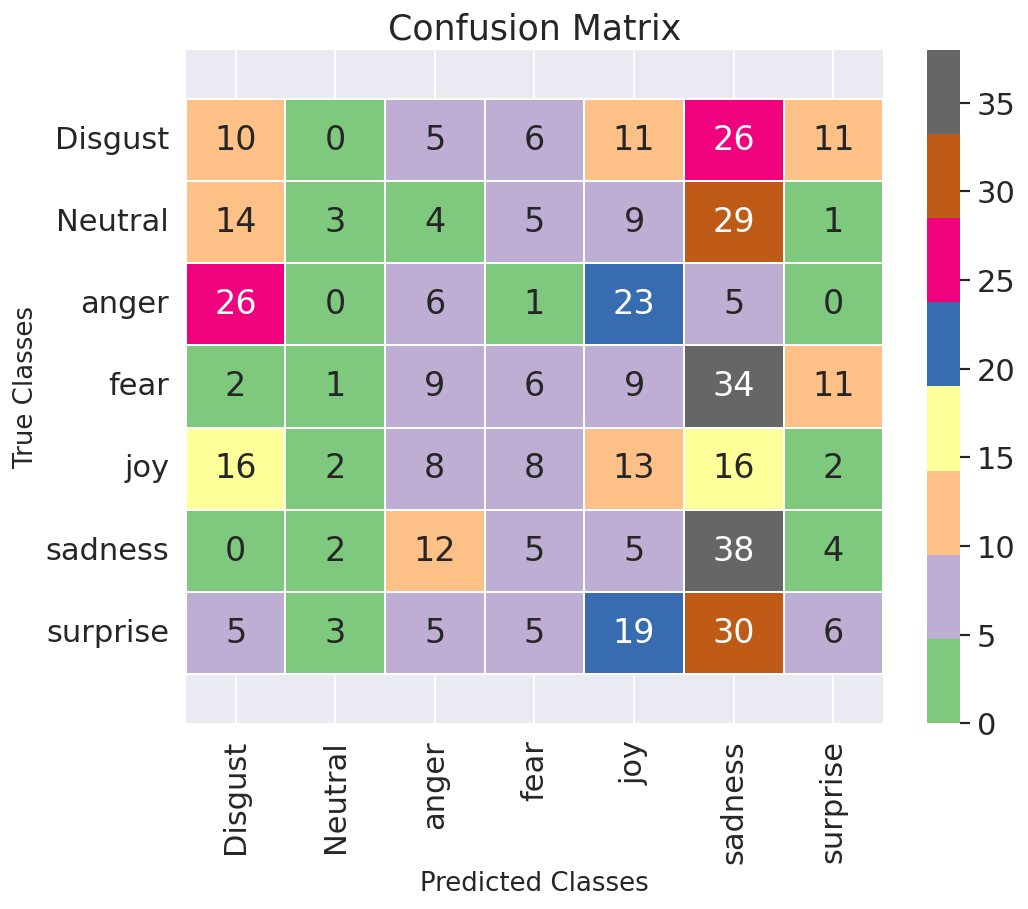

In [48]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()